In [1]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

taxi_averages = pd.read_csv('data/taxi_averages.csv')
events_cluster = pd.read_csv('data/events_cluster.csv')
taxi_hourly = pd.read_csv('data/taxi_hourly_aggregates.csv')

In [2]:
taxi_hourly['date'] = pd.to_datetime(taxi_hourly['date']).dt.dayofyear
events_cluster['date'] = pd.to_datetime(events_cluster['date']).dt.dayofyear


In [47]:
t_hourly_gropued = taxi_hourly.groupby(['zipcode', 'hour'])
stats = t_hourly_gropued['count'].agg([np.sum, np.min, np.max, np.mean, np.std]).sort_values('mean', ascending =False)

stats = stats.dropna()
stats.query('mean > 1').sort_values('mean')

,,sum,amin,amax,mean,std
zipcode,hour,,,,,
11365,15,93,1,2,1.021978,0.147424
11413,6,44,1,2,1.023256,0.152499
11358,0,43,1,2,1.023810,0.154303
11416,15,40,1,2,1.025641,0.160128
10475,23,36,1,2,1.028571,0.169031
11364,4,35,1,2,1.029412,0.171499
10465,9,32,1,2,1.032258,0.179605
11416,21,31,1,2,1.033333,0.182574
11429,9,30,1,2,1.034483,0.185695


In [4]:
taxi_averages.query('(zipcode == 10022) & (hour == 21)')

,zipcode,hour,average
4142,10022,21,1666.389041


<IPython.core.display.Javascript object>


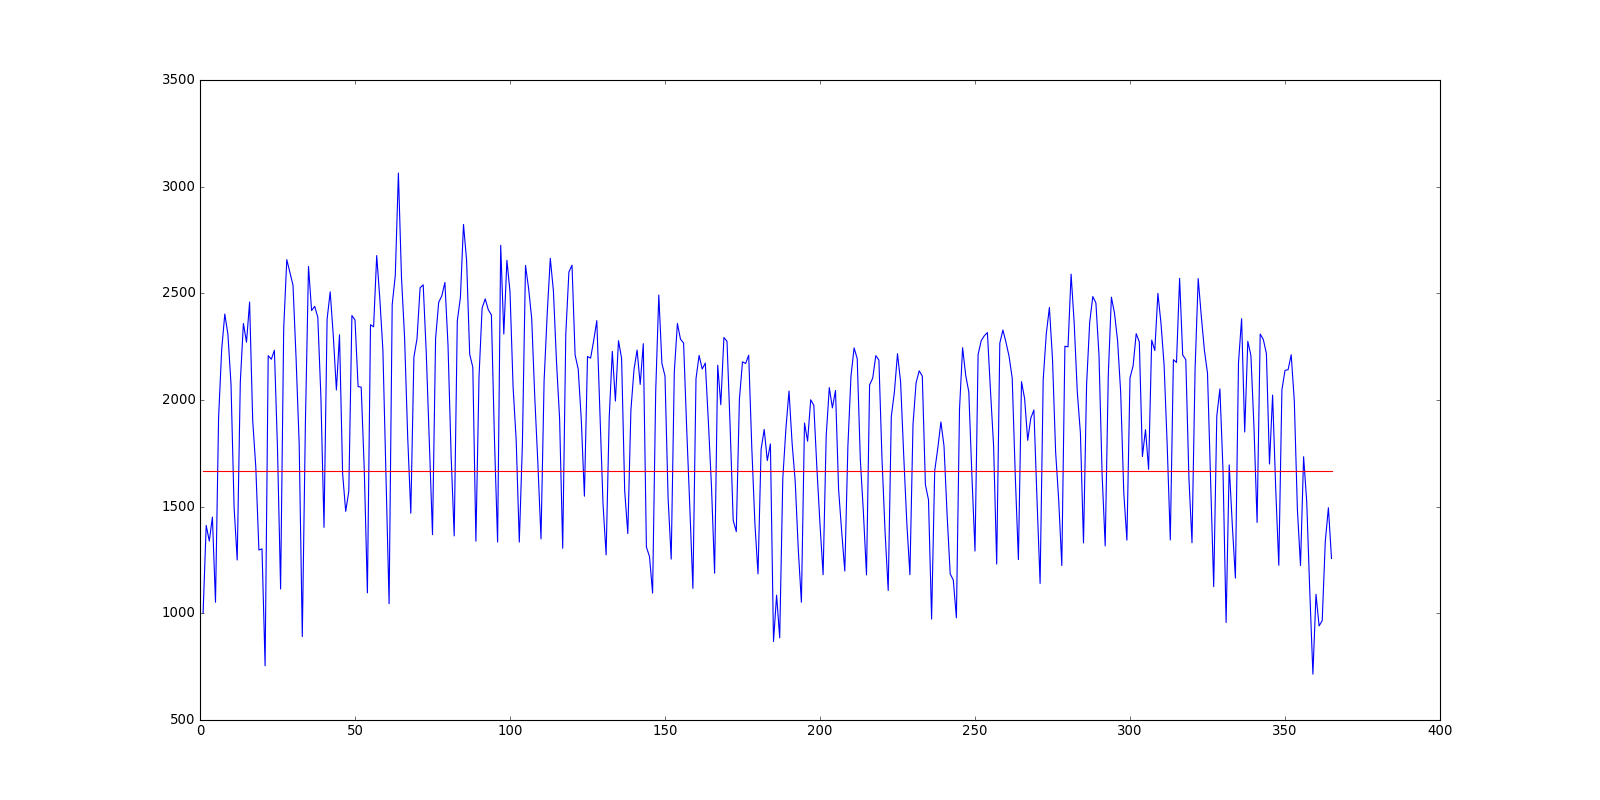

In [10]:
zipcode = 10019
hour = 20
mean = 1666.389041

plot_values = taxi_hourly.query('(zipcode=={0}) & (hour=={1})'.format(zipcode,hour))[['date','count']].as_matrix()
plt.figure(figsize=(20,10))
plt.plot(plot_values[:,0], plot_values[:,1],color='b')
plt.plot(plot_values[:,0], [mean]*len(plot_values), color='r')

In [50]:
events_cluster.groupby(['date','hour']).agg(np.max).sort_values('count', ascending=False)

zipcode  count
date hour                   
157  8          11554     87
98   12         11710     51
36   18         11211     35
337  12         11433     35
56   18         11590     34
     20         11590     34
163  0          11572     34
276  0          11530     32
155  0          11530     31
59   0          11530     30
343  0          10016     29
49   12         10954     28
249  22         11377     28
52   22         11553     27
160  0          11217     27
304  22         11710     26
57   15         11432     26
215  0          11791     25
119  12         11209     24
201  9     11549-1000     23
162  0          11566     23
50   15         11432     22
117  12         11217     21
62   15         11418     20
45   23         11373     20
112  18         11753     20
129  22         11710     19
299  12         11030     19
40   12         10038     19
113  10         11234     19
...               ...    ...
151  5          07094      1
26   13         10128      1
284  18         10954      1
81   21         11211      1
25   18         10001      1
331  4          11106      1
263  7          10019      1
284  8          10038      1
28   20         11211      1
179  23         10019      1
29   22         10002      1
265  8          07104      1
30   14         10457      1
328  8          07105      1
30   13         11219      1
265  7     11549-1000      1
304  5          11735      1
147  23         10030      1
304  4          10305      1
148  7          11374      1
114  13         11226      1
304  3          11225      1
29   19         10029      1
     18         11217      1
     17         10022      1
     15         11238      1
197  6          10019      1
329  6          11375      1
148  15         11218      1
97   22         11211      1

[6161 rows x 2 columns]